#  Homework #1
 Work to be done in this Jupyter Notebook and .pynb file turned in.   
 For full credit, all work must be shown.  
 Helpful Pandas Documentation: https://pandas.pydata.org/pandas-docs/stable/

### 1. Download Kaggle Titanic Data
https://www.kaggle.com/c/titanic/data

In [1]:
# Downloaded into my local machine

### 2. Create a Pandas DataFrame from the train.csv file

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df = df.dropna()

### 3. How many rows are in the DataFrame ?

In [5]:
df.shape

(183, 12)

In [6]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### 4. Using pandas, determine the min, max, median, and mean age of passengers in the training dataset?

In [7]:
#min age
min(df.Age)

0.92

In [8]:
#max age
max(df.Age)

80.0

In [9]:
#Median 
df.dropna()
def median(lst):
    n = len(lst)
    s = sorted(lst)
    return (s[n//2-1]/2.0+s[n//2]/2.0, s[n//2])[n % 2] if n else None
median(df.Age)

36.0

In [10]:
#mean
def mean(lst):
    return sum(lst)/len(lst)
    
mean(df.Age)
    

35.6744262295082

### 5. Using pandas, determine the average age and fare paid for males?  Females?

In [11]:
df_male = df[df["Sex"] == 'male']


In [12]:
mean(df_male.Age)

38.45178947368421

In [13]:
mean(df_male.Fare)

69.12434315789474

### 6. Who was more likely to have survived the disaster, a male or female passenger?

In [41]:
df_survivedSex = df.groupby('Sex')['Survived'].mean()
df_survivedSex

Sex
female    0.931818
male      0.431579
Name: Survived, dtype: float64

(0.0, 1.0)

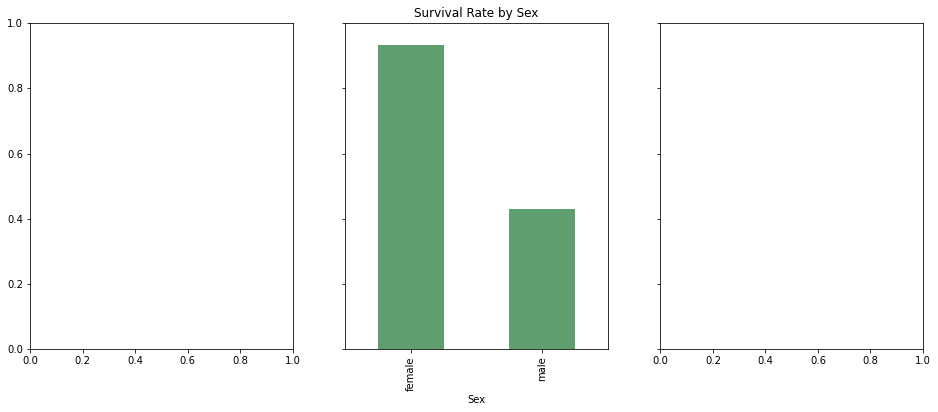

In [49]:
import matplotlib.pyplot as plt
fig, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize=(16,6))
ax = df_survivedSex.plot.bar(ax=axis2, color='#5F9E6E', title='Survival Rate by Sex', sharey=True)
ax.set_ylim(0.0,1.0)

### 7. What age group had a higher mean fare, those above or below the median age ?

In [30]:
df['ageRange'] = pd.cut(df['Age'], [0, 36, 150], labels=['below_med', 'above_med'])

In [34]:
df_mfare_above = df[df['ageRange'] == 'above_med']
df_mfare_above['Fare'].mean()

68.45559024390244

In [37]:
df_mfare_below = df[df['ageRange'] == 'below_med']
df_mfare_below['Fare'].mean()

86.98547920792082

In [ ]:
# this conclude the age group below median has higher fare

### 8. How many distinct passenger/ticket classes were there?  Use the Pclass column.

In [18]:
df_dp = df.groupby(['Pclass']).size().reset_index(name = 'sum_count')
df_dp

,Pclass,sum_count
0,1,158
1,2,15
2,3,10


### 9. Count the rows by Pclass value using groupby.

In [22]:
df.groupby(['Pclass']).size()

Pclass
1    158
2     15
3     10
dtype: int64

### 10. Sort the dataframe by age.

In [23]:
df.sort_values(by=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,F2,S
...,...,...,...,...,...,...,...,...,...,...,...,...
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,B30,C
456,457,0,1,"Millet, Mr. Francis Davis",male,65.00,0,0,13509,26.5500,E38,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71.0000,B22,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C
